In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
import math
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df1=pd.read_csv("C:/Users/user2212/Desktop/Parrot/프로젝트/normal.csv") #77296
df1

,Unnamed: 0,year,family_member,year_born_age,cpi,new_income,minus,log_minus,plus,log_plus,...,marriage_6.0,reason_none_worker_2,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0
0,0,2005.0,1.0,84.0,74.4,6.182796,NaN,NaN,6.182796,1.821771,...,0,1,0,0,0,0,1,0,0,0
1,1,2018.0,3.0,85.0,99.1,17.285570,NaN,NaN,17.285570,2.849872,...,0,0,0,0,0,0,0,0,0,0
2,2,2012.0,3.0,57.0,91.8,31.089325,NaN,NaN,31.089325,3.436865,...,0,1,0,0,0,1,0,0,0,0
3,3,2011.0,5.0,77.0,89.9,47.719689,NaN,NaN,47.719689,3.865344,...,0,1,0,0,0,0,1,0,0,0
4,4,2017.0,2.0,84.0,97.6,16.475410,NaN,NaN,16.475410,2.801869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77291,77291,2007.0,4.0,59.0,78.0,75.128205,NaN,NaN,75.128205,4.319196,...,0,1,0,0,0,0,0,0,0,1
77292,77292,2006.0,4.0,52.0,76.1,49.198423,NaN,NaN,49.198423,3.895862,...,0,1,0,0,0,1,0,0,0,0
77293,77293,2006.0,4.0,83.0,76.1,37.285693,NaN,NaN,37.285693,3.618610,...,0,0,0,0,0,0,0,0,0,0
77294,77294,2018.0,1.0,88.0,99.1,17.124117,NaN,NaN,17.124117,2.840488,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df1=df1[df1.new_income>0] #77118 
df1

,Unnamed: 0,year,family_member,year_born_age,cpi,new_income,minus,log_minus,plus,log_plus,...,marriage_6.0,reason_none_worker_2,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0
0,0,2005.0,1.0,84.0,74.4,6.182796,NaN,NaN,6.182796,1.821771,...,0,1,0,0,0,0,1,0,0,0
1,1,2018.0,3.0,85.0,99.1,17.285570,NaN,NaN,17.285570,2.849872,...,0,0,0,0,0,0,0,0,0,0
2,2,2012.0,3.0,57.0,91.8,31.089325,NaN,NaN,31.089325,3.436865,...,0,1,0,0,0,1,0,0,0,0
3,3,2011.0,5.0,77.0,89.9,47.719689,NaN,NaN,47.719689,3.865344,...,0,1,0,0,0,0,1,0,0,0
4,4,2017.0,2.0,84.0,97.6,16.475410,NaN,NaN,16.475410,2.801869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77291,77291,2007.0,4.0,59.0,78.0,75.128205,NaN,NaN,75.128205,4.319196,...,0,1,0,0,0,0,0,0,0,1
77292,77292,2006.0,4.0,52.0,76.1,49.198423,NaN,NaN,49.198423,3.895862,...,0,1,0,0,0,1,0,0,0,0
77293,77293,2006.0,4.0,83.0,76.1,37.285693,NaN,NaN,37.285693,3.618610,...,0,0,0,0,0,0,0,0,0,0
77294,77294,2018.0,1.0,88.0,99.1,17.124117,NaN,NaN,17.124117,2.840488,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df1=df1[df1.new_income<1000] #77108
df1
df1=df1[df1.new_income>=3] #5->75204, #3->76685 (0.7%)
df1

,Unnamed: 0,year,family_member,year_born_age,cpi,new_income,minus,log_minus,plus,log_plus,...,marriage_6.0,reason_none_worker_2,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0
0,0,2005.0,1.0,84.0,74.4,6.182796,NaN,NaN,6.182796,1.821771,...,0,1,0,0,0,0,1,0,0,0
1,1,2018.0,3.0,85.0,99.1,17.285570,NaN,NaN,17.285570,2.849872,...,0,0,0,0,0,0,0,0,0,0
2,2,2012.0,3.0,57.0,91.8,31.089325,NaN,NaN,31.089325,3.436865,...,0,1,0,0,0,1,0,0,0,0
3,3,2011.0,5.0,77.0,89.9,47.719689,NaN,NaN,47.719689,3.865344,...,0,1,0,0,0,0,1,0,0,0
4,4,2017.0,2.0,84.0,97.6,16.475410,NaN,NaN,16.475410,2.801869,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77291,77291,2007.0,4.0,59.0,78.0,75.128205,NaN,NaN,75.128205,4.319196,...,0,1,0,0,0,0,0,0,0,1
77292,77292,2006.0,4.0,52.0,76.1,49.198423,NaN,NaN,49.198423,3.895862,...,0,1,0,0,0,1,0,0,0,0
77293,77293,2006.0,4.0,83.0,76.1,37.285693,NaN,NaN,37.285693,3.618610,...,0,0,0,0,0,0,0,0,0,0
77294,77294,2018.0,1.0,88.0,99.1,17.124117,NaN,NaN,17.124117,2.840488,...,0,0,0,0,0,0,0,0,0,0


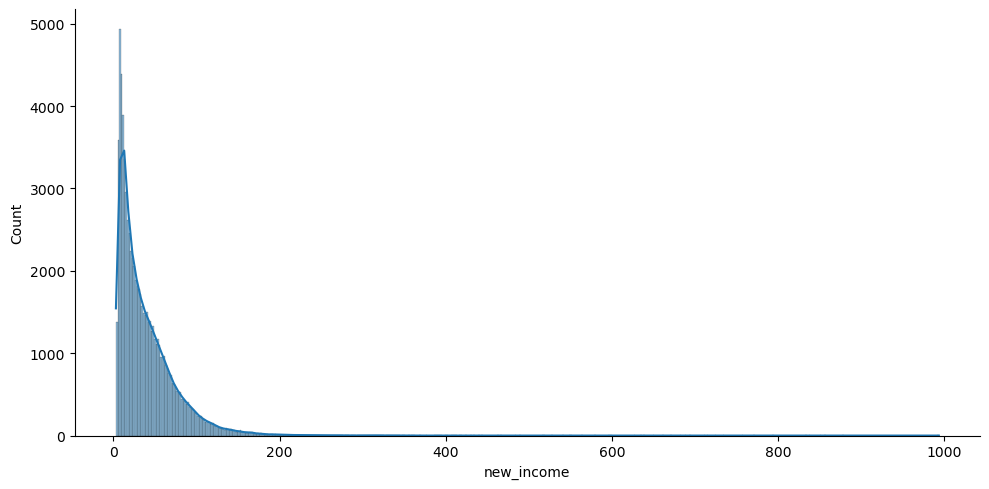

In [44]:
sns.displot(df1.new_income, height=5, aspect=2, kde=True)

In [41]:
df1.plus=0
df1.loc[df1['new_income'] >= 0, 'plus'] = df1.loc[df1['new_income'] >= 0,'new_income']
#sns.displot(df1.plus, height=5, aspect=2, kde=True)
#sns.histplot(df1['plus']) #양수만 있어서 절댓값 안함!!
df1['log_plus']=np.log(df1['new_income'])

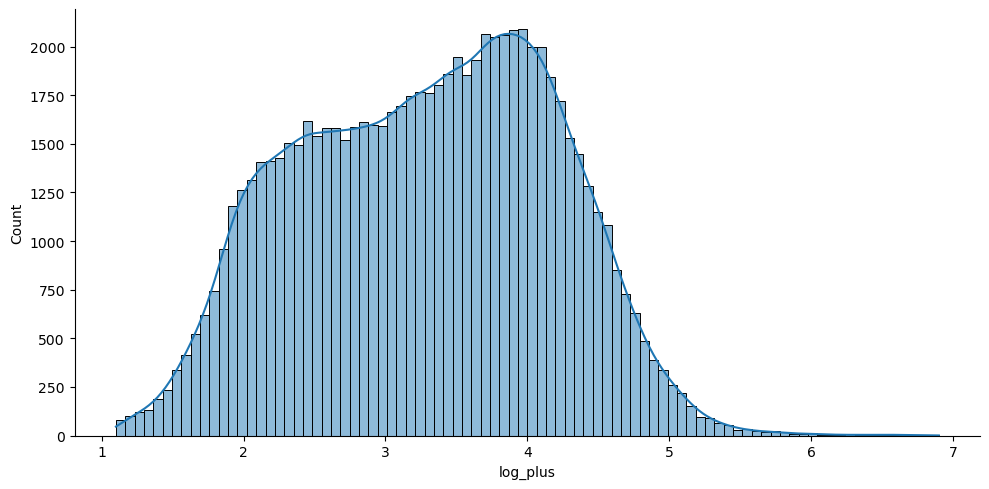

In [42]:
sns.displot(df1.log_plus, height=5, aspect=2, kde=True)

In [8]:
df1.columns

Index(['Unnamed: 0', 'year', 'family_member', 'year_born_age', 'cpi',
       'new_income', 'minus', 'log_minus', 'plus', 'log_plus', 'new_region_1',
       'new_region_2', 'new_education_level_2', 'new_education_level_3',
       'new_education_level_4', 'realcom_2', 'realcom_3', 'marriage_2.0',
       'marriage_3.0', 'marriage_4.0', 'marriage_5.0', 'marriage_6.0',
       'reason_none_worker_2', 'occupation_2.0', 'occupation_3.0',
       'occupation_4.0', 'occupation_5.0', 'occupation_6.0', 'occupation_7.0',
       'occupation_8.0', 'occupation_9.0'],
      dtype='object')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV 
import math
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
df1=df1.drop(['Unnamed: 0', 'year', 'cpi', 'new_income', 'minus', 'log_minus'], axis=1) #income 이상치 제거
df1

,family_member,year_born_age,plus,log_plus,new_region_1,new_region_2,new_education_level_2,new_education_level_3,new_education_level_4,realcom_2,...,marriage_6.0,reason_none_worker_2,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0
0,1.0,84.0,6.182796,1.821771,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,3.0,85.0,17.285570,2.849872,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,57.0,31.089325,3.436865,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,5.0,77.0,47.719689,3.865344,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,2.0,84.0,16.475410,2.801869,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77291,4.0,59.0,75.128205,4.319196,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
77292,4.0,52.0,49.198423,3.895862,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
77293,4.0,83.0,37.285693,3.618610,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
77294,1.0,88.0,17.124117,2.840488,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df1=df1.log_plus.dropna
df1

<bound method Series.dropna of 0        1.821771
1        2.849872
2        3.436865
3        3.865344
4        2.801869
           ...   
77291    4.319196
77292    3.895862
77293    3.618610
77294    2.840488
77295    4.242249
Name: log_plus, Length: 76685, dtype: float64>

In [14]:
DF=pd.read_csv('C:/패럿/fnormal.csv')
DF

,family_member,year_born_age,plus,log_plus,new_region_1,new_region_2,new_education_level_2,new_education_level_3,new_education_level_4,realcom_2,...,marriage_6.0,reason_none_worker_2,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_7.0,occupation_8.0,occupation_9.0
0,1.0,84.0,6.182796,1.821771,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,3.0,85.0,17.285570,2.849872,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,57.0,31.089325,3.436865,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,5.0,77.0,47.719689,3.865344,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,1,0,0,0
4,2.0,84.0,16.475410,2.801869,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76680,4.0,59.0,75.128205,4.319196,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
76681,4.0,52.0,49.198423,3.895862,0.0,1.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0
76682,4.0,83.0,37.285693,3.618610,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
76683,1.0,88.0,17.124117,2.840488,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# LinearRegression

In [65]:
# 모델을 적용하기에 앞서서, y와 X split / 독립변수와 종속변수 분리
X = DF.drop(['plus','log_plus'], axis=1)
y = DF.log_plus

def LR(x,y):
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    return p

In [66]:
from sklearn.model_selection import train_test_split

# 데이터 split (train 데이터와 test 데이터를 구분)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [67]:
from sklearn.preprocessing import StandardScaler

# 데이터 scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

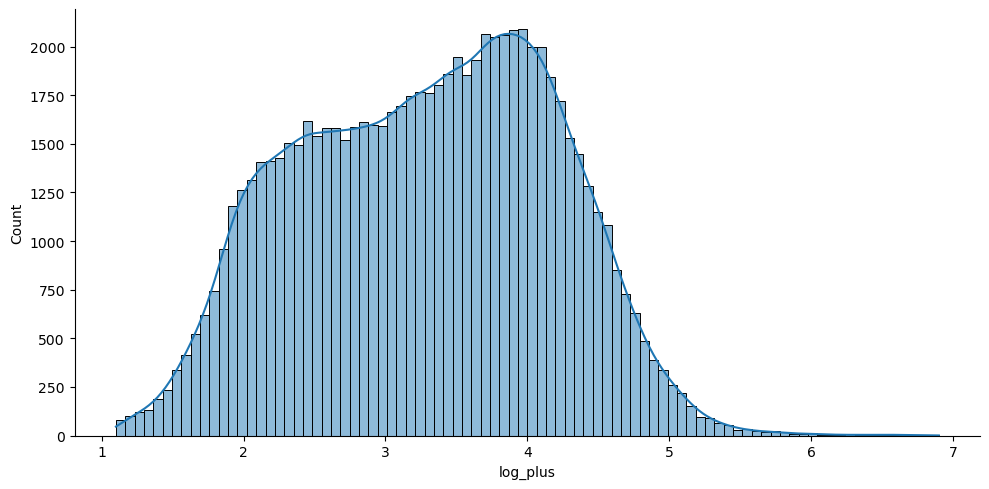

In [68]:
sns.displot(DF.log_plus, height=5, aspect=2, kde=True)

train set R^2 score: 0.6530427988709417
test set R^2 score: 0.6603117817130568
log RMSE: 0.5197321766715761
RMSE: 30.193802528311107


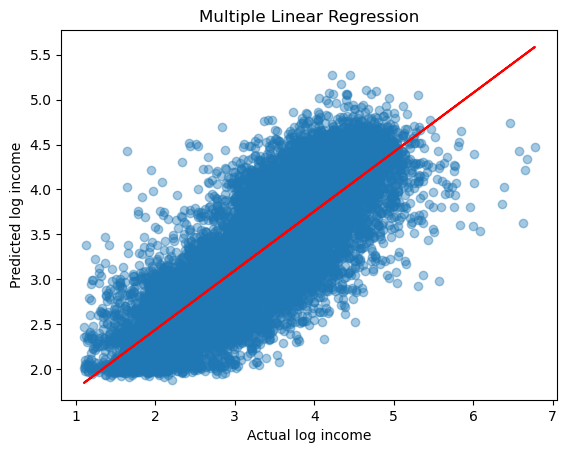

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #회귀분석 모형 객체 생성
model.fit(X_train, y_train) #train data로 모형 학습
pred = model.predict(X_test) #test 데이터로 예측하기
#학습을 마친 모형에 test data를 적용해 결정계수(R-square) 계산
score = model.score(X_test, y_test) 
mse1 = mean_squared_error(y_test, pred)
rmse1 = math.sqrt(mse1)
mse2 = mean_squared_error(np.exp(y_test), np.exp(pred))
rmse2 = math.sqrt(mse2)
print("train set R^2 score:", model.score(X_train, y_train)) #훈련 데이터의 점수
print("test set R^2 score:", model.score(X_test, y_test)) #테스트 데이터의 점수
print("log RMSE:", rmse1)
print("RMSE:", rmse2)

plt.scatter(y_test, pred, alpha=0.4)
pylab.plot(y_test, LR(y_test, pred)(y_test), 'r-')
plt.title("Multiple Linear Regression")
plt.xlabel('Actual log income')
plt.ylabel('Predicted log income')
plt.show()

In [70]:
import pandas as pd         #DataFrame 활용 라이브럴
import numpy as np          #행렬 활용 라이브러리
from statsmodels.formula.api import ols
import statsmodels.api as sm

x_data = DF[['family_member', 'year_born_age','new_region_1',
       'new_region_2', 'new_education_level_2', 'new_education_level_3',
       'new_education_level_4', 'realcom_2', 'realcom_3', 'marriage_2.0',
       'marriage_3.0', 'marriage_4.0', 'marriage_5.0', 'marriage_6.0',
       'reason_none_worker_2', 'occupation_2.0', 'occupation_3.0',
       'occupation_4.0', 'occupation_5.0', 'occupation_6.0', 'occupation_7.0',
       'occupation_8.0', 'occupation_9.0']]

target=DF['log_plus']




# 회귀분석을 하기 위한 B_0, 상수항 추가
x_data = sm.add_constant(x_data, has_constant = "add")

# 회귀모델 적합
multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()

# summary함수를 통해 OLS 결과 출력
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_plus   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     6315.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        23:04:34   Log-Likelihood:                -59201.
No. Observations:               76685   AIC:                         1.184e+05
Df Residuals:                   76661   BIC:                         1.187e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.7825      0.021    132.350      0.000       2.741       2.824
family_member             0.2160      0.002    101.554      0.000       0.212       0.220
year_born_age            -0.0076      0.000    -37.751      0.000      -0.008      -0.007
new_region_1              0.1389      0.006     25.108      0.000       0.128       0.150
new_region_2              0.0656      0.005     13.511      0.000       0.056       0.075
new_education_level_2     0.4573      0.009     50.236      0.000       0.439       0.475
new_education_level_3     0.3712      0.008     46.549      0.000       0.356       0.387
new_education_level_4     0.2556      0.007     37.510      0.000       0.242       0.269
realcom_2                 0.0952      0.007     13.749      0.000       0.082       0.109
realcom_3                 0.2688      0.007     36.699      0.000       0.254       0.283
marriage_2.0             -0.2489      0.006    -40.606      0.000      -0.261      -0.237
marriage_3.0             -0.3141      0.008    -40.202      0.000      -0.329      -0.299
marriage_4.0             -0.2710      0.018    -15.221      0.000      -0.306      -0.236
marriage_5.0             -0.2958      0.010    -30.381      0.000      -0.315      -0.277
marriage_6.0             -0.0595      0.077     -0.770      0.441      -0.211       0.092
reason_none_worker_2      0.7234      0.013     56.439      0.000       0.698       0.749
occupation_2.0           -0.1125      0.014     -8.329      0.000      -0.139      -0.086
occupation_3.0           -0.2002      0.013    -15.050      0.000      -0.226      -0.174
occupation_4.0           -0.2782      0.015    -19.143      0.000      -0.307      -0.250
occupation_5.0           -0.2918      0.014    -20.711      0.000      -0.319      -0.264
occupation_6.0           -0.5258      0.013    -39.310      0.000      -0.552      -0.500
occupation_7.0           -0.2908      0.013    -21.566      0.000      -0.317      -0.264
occupation_8.0           -0.2453      0.013    -18.563      0.000      -0.271      -0.219
occupation_9.0           -0.5176      0.013    -40.343      0.000      -0.543      -0.492
==============================================================================
Omnibus:                     1874.673   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3224.070
Skew:                           0.216   Prob(JB):                         0.00
Kurtosis:                       3.907   Cond. No.                     2.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+03. This might indicate that there are

# DecisionTreeRegressor

In [76]:
from sklearn.model_selection import train_test_split

# 데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [77]:
from sklearn.preprocessing import StandardScaler

# 데이터 scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

{'max_depth': 10}
train set R^2 score: 0.7141227063791171
test set R^2 score: 0.6981210052686788
log RMSE: 0.48995456719272945
RMSE: 29.062314252691472


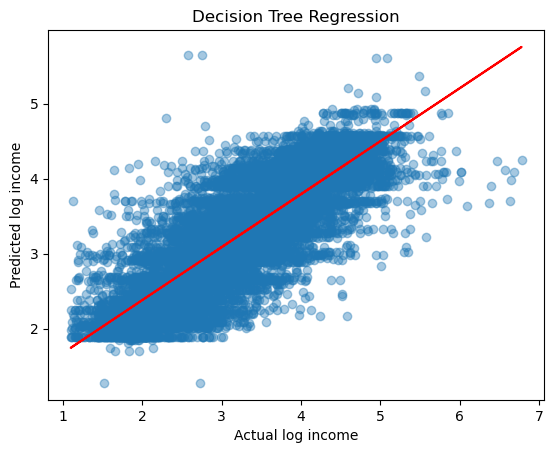

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# Grid_Search로 찾아낸 값
model = DecisionTreeRegressor()

param_grid = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}


grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2', refit=True)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(grid_search.best_params_)

model.fit(X_train, y_train)
pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse1 = mean_squared_error(y_test, pred)
rmse1 = math.sqrt(mse1)
mse2 = mean_squared_error(np.exp(y_test), np.exp(pred))
rmse2 = math.sqrt(mse2)
print("train set R^2 score:", model.score(X_train, y_train))
print("test set R^2 score:", model.score(X_test, y_test))
print("log RMSE:", rmse1)
print("RMSE:", rmse2)

plt.scatter(y_test, pred, alpha=0.4)
pylab.plot(y_test, LR(y_test, pred)(y_test), 'r-')
plt.title("Decision Tree Regression")
plt.xlabel('Actual log income')
plt.ylabel('Predicted log income')
plt.show()